# Import modules

In [19]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from dateutil.parser import parse
import boto3
import io
from pytz import timezone
from scipy import signal
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline 



# Import Customized Module

In [20]:
from MealTag import *

# Set up S3 connection

In [21]:
CONFIG = {
    'bucketname': 'aads-tagyourmeal',
    'sample_rate': 50,
    'reference_time': parse('2019-01-01 00:00:00 +0000'),
    'timezone': timezone("America/Indianapolis")    
}

# Catalog the Contents

It generate 3 dataframe contains detailed information. 

!! This works fine when data is not huge, evently, this function will move to Lambda and catalog will be saved in a database

In [22]:
mealtag_catalog = catalog(CONFIG, tzonedict='America/Indianapolis')



# List the catalog

In [23]:
mealtagcatalog.motion.sort_values(by=['secelapsed'], ascending=False)

,user,secelapsed,timestamp,date,time,timezone,minutes,path
8,03f9,7474232.0,2019-03-28 12:10:32 +0000,2019-03-28,08:10:32,America/Indianapolis,126,s3://aads-tagyourmeal/03f9_motion_2019-03-28 1...
7,03f9,7228564.0,2019-03-25 15:56:04 +0000,2019-03-25,11:56:04,America/Indianapolis,3,s3://aads-tagyourmeal/03f9_motion_2019-03-25 1...
6,03f9,7228377.0,2019-03-25 15:52:57 +0000,2019-03-25,11:52:57,America/Indianapolis,0,s3://aads-tagyourmeal/03f9_motion_2019-03-25 1...
5,03f9,7228292.0,2019-03-25 15:51:32 +0000,2019-03-25,11:51:32,America/Indianapolis,0,s3://aads-tagyourmeal/03f9_motion_2019-03-25 1...
4,03f9,7213613.0,2019-03-25 11:46:53 +0000,2019-03-25,07:46:53,America/Indianapolis,4,s3://aads-tagyourmeal/03f9_motion_2019-03-25 1...
1,02ce,6970585.0,2019-03-22 16:16:25 +0000,2019-03-22,12:16:25,America/Indianapolis,2,s3://aads-tagyourmeal/02ce_motion_2019-03-22 1...
3,03f9,6970452.0,2019-03-22 16:14:12 +0000,2019-03-22,12:14:12,America/Indianapolis,2,s3://aads-tagyourmeal/03f9_motion_2019-03-22 1...
2,03f9,6965686.0,2019-03-22 14:54:46 +0000,2019-03-22,10:54:46,America/Indianapolis,55,s3://aads-tagyourmeal/03f9_motion_2019-03-22 1...
0,02ce,6894406.0,2019-03-21 19:06:46 +0000,2019-03-21,15:06:46,America/Indianapolis,0,s3://aads-tagyourmeal/02ce_motion_2019-03-21 1...
12,jieshen,6481927.0,2019-03-17 00:32:07 +0000,2019-03-16,20:32:07,America/Indianapolis,14,s3://aads-tagyourmeal/jieshen_motion_2019-03-1...


In [24]:
mealtagcatalog.event.sort_values(by=['secelapsed'], ascending=False)

,user,secelapsed,timestamp,date,time,timezone,path
8,03f9,7474232.0,2019-03-28 12:10:32 +0000,2019-03-28,08:10:32,America/Indianapolis,s3://aads-tagyourmeal/03f9_event_2019-03-28 12...
7,03f9,7228564.0,2019-03-25 15:56:04 +0000,2019-03-25,11:56:04,America/Indianapolis,s3://aads-tagyourmeal/03f9_event_2019-03-25 15...
6,03f9,7228377.0,2019-03-25 15:52:57 +0000,2019-03-25,11:52:57,America/Indianapolis,s3://aads-tagyourmeal/03f9_event_2019-03-25 15...
5,03f9,7228292.0,2019-03-25 15:51:32 +0000,2019-03-25,11:51:32,America/Indianapolis,s3://aads-tagyourmeal/03f9_event_2019-03-25 15...
4,03f9,7213613.0,2019-03-25 11:46:53 +0000,2019-03-25,07:46:53,America/Indianapolis,s3://aads-tagyourmeal/03f9_event_2019-03-25 11...
1,02ce,6970585.0,2019-03-22 16:16:25 +0000,2019-03-22,12:16:25,America/Indianapolis,s3://aads-tagyourmeal/02ce_event_2019-03-22 16...
3,03f9,6970452.0,2019-03-22 16:14:12 +0000,2019-03-22,12:14:12,America/Indianapolis,s3://aads-tagyourmeal/03f9_event_2019-03-22 16...
2,03f9,6965686.0,2019-03-22 14:54:46 +0000,2019-03-22,10:54:46,America/Indianapolis,s3://aads-tagyourmeal/03f9_event_2019-03-22 14...
0,02ce,6894406.0,2019-03-21 19:06:46 +0000,2019-03-21,15:06:46,America/Indianapolis,s3://aads-tagyourmeal/02ce_event_2019-03-21 19...
12,jieshen,6481927.0,2019-03-17 00:32:07 +0000,2019-03-16,20:32:07,America/Indianapolis,s3://aads-tagyourmeal/jieshen_event_2019-03-17...


# Plot some data

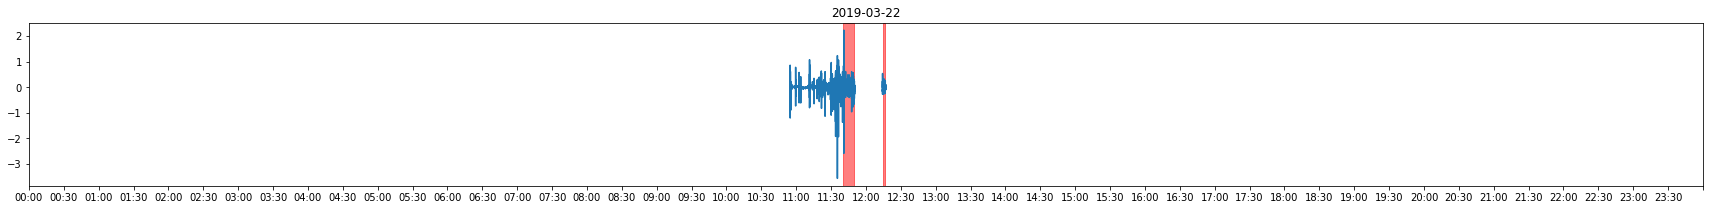

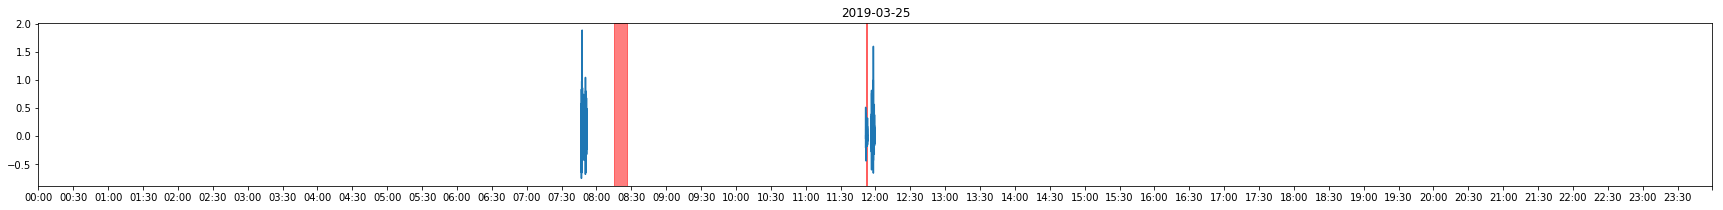

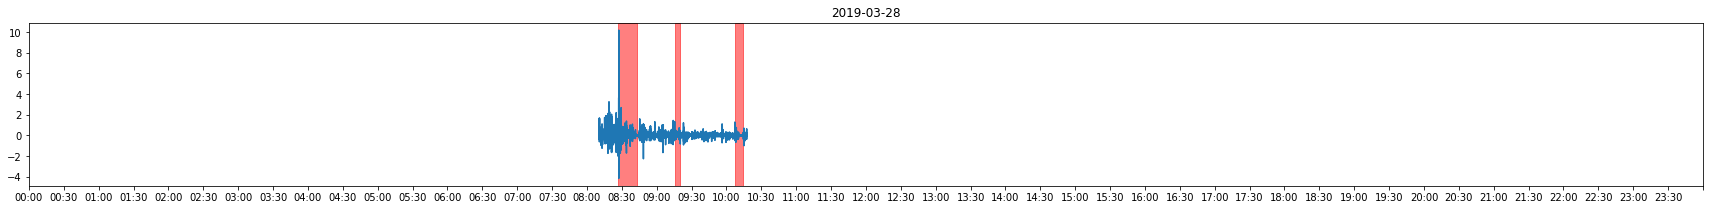

In [6]:
user1 = userdata("03f9", mealtagcatalog, CONFIG, dates='all')
df = user1.toPandas()
user1.draw_day_gram("accl_x")

In [7]:
df

,row,accl_x,accl_y,accl_z,gyro_x,gyro_y,gyro_z,ts,tag,utsl
0,1,-0.007684,0.017230,0.011170,-0.009643,0.025852,-0.008169,6965686.00,0,NaN
1,2,0.026700,-0.012643,-0.015252,-0.008305,0.007629,-0.009272,6965686.02,0,NaN
2,3,-0.006902,0.012372,-0.008443,-0.017010,0.013858,0.004661,6965686.04,0,NaN
3,4,-0.008196,-0.018297,0.001956,-0.021505,0.025822,-0.042460,6965686.06,0,NaN
4,5,-0.000520,-0.009215,0.013704,-0.026415,-0.004185,-0.059676,6965686.08,0,NaN
5,6,-0.003248,0.005922,0.005989,-0.010448,0.000201,-0.051043,6965686.10,0,NaN
6,7,0.000767,0.011412,-0.005687,-0.027535,0.002058,-0.015751,6965686.12,0,NaN
7,8,0.004493,-0.001784,-0.013682,-0.043899,0.026479,0.012092,6965686.14,0,NaN
8,9,0.003779,-0.014889,-0.000365,-0.086532,0.020701,0.026927,6965686.16,0,NaN
9,10,0.019712,0.003452,0.010256,-0.071396,0.010007,0.048381,6965686.18,0,NaN


# First 100s Power Density of Mean Accelerometer

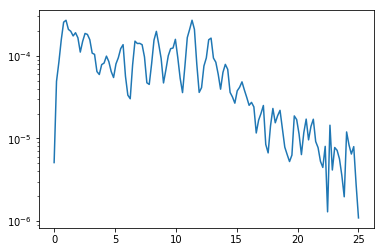

In [11]:
f, Pxx_den = signal.welch(df.iloc[0:100*CONFIG['sample_rate'],:]["accl_x"], CONFIG['sample_rate'])
plt.semilogy(f, Pxx_den)


# Feature Engineering, using Welch's method to estimate the power spectural density

In [14]:
windowsize=60
sample_rate = CONFIG['sample_rate']

features = []
tags = []
for i in range(len(df) // (sample_rate * windowsize)):
    chunk = df.iloc[i*(sample_rate * windowsize):(i+1)*(sample_rate * windowsize),:]
    _, Pxx_den_x = signal.welch(chunk["accl_x"],sample_rate)
    _, Pxx_den_y = signal.welch(chunk["accl_y"],sample_rate)
    _, Pxx_den_z = signal.welch(chunk["accl_z"],sample_rate)
    feature = np.append(Pxx_den_x,Pxx_den_y)
    feature = np.append(feature, Pxx_den_z)
    features.append(feature)
    tags.append(chunk['tag'].median())
# print(len(features))

In [15]:
X=np.asarray(features)
y=np.asarray(tags)
print(X.shape)
print(y.shape)

(194, 387)
(194,)


# Visulization of the features
## PCA



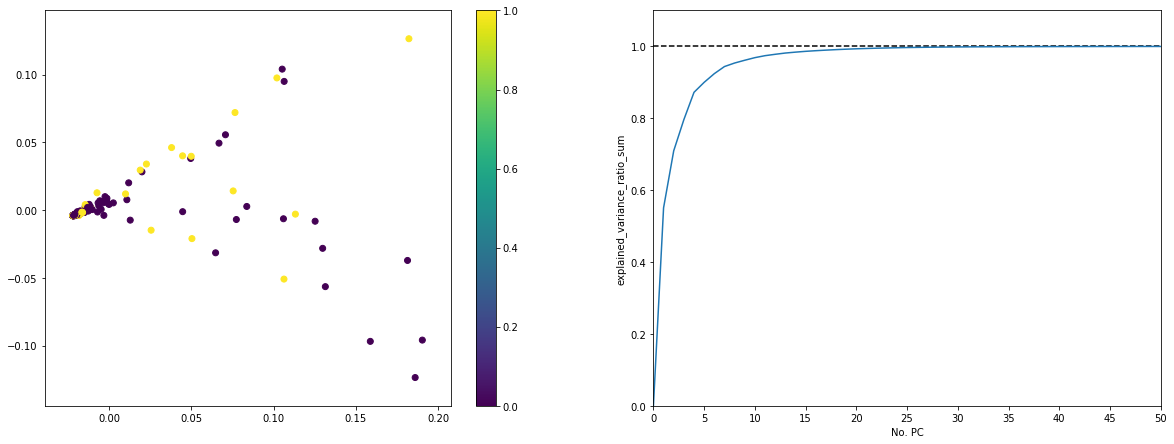

In [16]:
def plot_pca(X, y, nc=100):

    pca = PCA(n_components=nc)
    principalComponents = pca.fit_transform(X)

    principalDf = pd.DataFrame(data = principalComponents[:,0:2], columns = ['principal component 1', 'principal component 2'])
    finalDF = pd.concat([principalDf, pd.DataFrame(tags)], axis = 1)
    fig = plt.figure(figsize=(20,16))
    fig.add_axes()
    ax1 = fig.add_subplot(221)
    sc = plt.scatter(x="PC1",
                     y="PC2",
                     data=pd.DataFrame(data = principalComponents[:,0:2], columns = ['PC1', 'PC2']),
                     c=tags,
                     cmap='viridis')
    plt.colorbar(sc)

    
    pcaratio=pca.explained_variance_ratio_
    s = 0
    s_list=[0]
    for r in pcaratio:
        s+=r
        s_list.append(s)

    ax2 = fig.add_subplot(222)
    ax2.plot(s_list)
    ax2.hlines(s_list[-1],0,nc,linestyles='dashed')
    ax2.axis([0,nc,0,1.1])
    plt.xticks(np.arange(0,nc+1,step=5))
    plt.ylabel('explained_variance_ratio_sum')
    plt.xlabel('No. PC')
    plt.show()
    
    return principalComponents


principalComponents = plot_pca(X,y,nc=50)


## Using t-SNE

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 194 samples in 0.001s...
[t-SNE] Computed neighbors for 194 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 194 / 194
[t-SNE] Mean sigma: 0.000035
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.684704
[t-SNE] Error after 1000 iterations: 0.592359


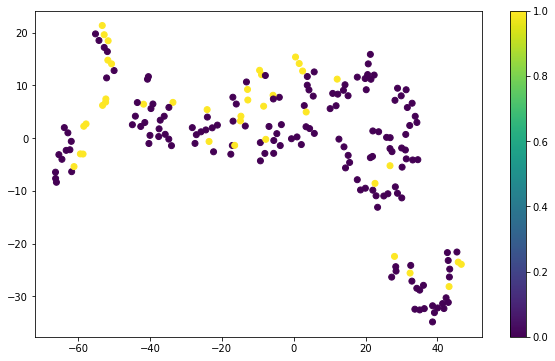

In [18]:
from sklearn.manifold import TSNE
lr = 10
pp = 5

def plot_tsne(X, y, lr=10, pp=5):
    X_tsne = TSNE(learning_rate=lr,
                  n_components=2, 
                  perplexity=pp, 
                  verbose=1, 
                  n_iter=1000).fit_transform(X)

    fig = plt.figure(figsize=(10,6))
#     fig.set(title="t-SNE on PCA")
    sc = plt.scatter(x="PC1",
                     y="PC2",
                     data=pd.DataFrame(data = X_tsne[:,0:2], columns = ['PC1', 'PC2']),
                     c=tags,
                     cmap='viridis')
    plt.colorbar(sc)


plot_tsne(X,y, 10, 5)

In [40]:
!git add sensor_data_lookup-demo.ipynb
!git add models.py
!git commit -m "add sensor data"

[master 8d838e6] add sensor data
 Committer: EC2 Default User <ec2-user@ip-172-16-65-99.us-east-2.compute.internal>
Your name and email address were configured automatically based
on your username and hostname. Please check that they are accurate.
You can suppress this message by setting them explicitly:

    git config --global user.name "Your Name"
    git config --global user.email you@example.com

After doing this, you may fix the identity used for this commit with:

    git commit --amend --reset-author

 2 files changed, 194 insertions(+), 5 deletions(-)


In [41]:
!git push

Counting objects: 6, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (6/6), 2.83 KiB | 724.00 KiB/s, done.
Total 6 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/jieeshen/digitalhealth.git
   c89a782..8d838e6  master -> master


In [ ]:
from sklearn.manifold import TSNE
lr = 10
pp = 5

def plot_tsne(X, y, lr=10, pp=5):
    X_tsne_pca = TSNE(learning_rate=lr,
                      n_components=2, 
                      perplexity=pp, 
                      verbose=1, 
                      n_iter=1000).fit_transform(principalComponents)

    X_tsne = TSNE(learning_rate=lr,
                  n_components=2, 
                  perplexity=pp, 
                  verbose=1, 
                  n_iter=1000).fit_transform(X)

    fig = plt.figure(figsize=(10,6))
    fig.add_axes()
    ax1 = fig.add_subplot(221)
    ax1.set(title="t-SNE on PCA")
    sc = plt.scatter(x="PC1",
                     y="PC2",
                     data=pd.DataFrame(data = X_tsne_pca[:,0:2], columns = ['PC1', 'PC2']),
                     c=tags,
                     cmap='viridis')
    plt.colorbar(sc)

    ax2 = fig.add_subplot(222)
    ax2.set(title="t-SNE on X")
    sc = plt.scatter(x="PC1",
                     y="PC2",
                     data=pd.DataFrame(data = X_tsne[:,0:2], columns = ['PC1', 'PC2']),
                     c=tags,
                     cmap='viridis')
    plt.colorbar(sc)